# Final Combined Analysis: Pittsburgh's Most Livable Neighborhood

## Integrating Green Space, Safety, and Facilities Metrics

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import numpy as np
from scipy import stats
import warnings
from pathlib import Path
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)

## 1.1 Load All Three Metric Scores

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

project_root = Path('/Users/valimir7/dev/pitt/cmpinf0010/final')
data_dir = project_root / 'data' / 'outputs'
docs_dir = project_root / 'docs'

data_dir.mkdir(parents=True, exist_ok=True)
docs_dir.mkdir(parents=True, exist_ok=True)

print("\n" + "="*80)
print("PITTSBURGH LIVABILITY ANALYSIS: LOADING METRICS")
print("="*80)

print(f"\nData directory: {data_dir}")
print(f"Docs directory: {docs_dir}")
print("\n1. Loading metric scores from individual analyses...")

green_space_df = pd.read_csv(str(data_dir / 'green_space_scores.csv'))
print(f"   ✓ Green Space: {len(green_space_df)} neighborhoods")

safety_df = pd.read_csv(str(data_dir / 'safety_scores.csv'))
print(f"   ✓ Safety: {len(safety_df)} neighborhoods")

facilities_df = pd.read_csv(str(data_dir / 'facilities_scores.csv'))
print(f"   ✓ Facilities: {len(facilities_df)} neighborhoods")


PITTSBURGH LIVABILITY ANALYSIS: LOADING METRICS

Data directory: /Users/valimir7/dev/pitt/cmpinf0010/final/data/outputs
Docs directory: /Users/valimir7/dev/pitt/cmpinf0010/final/docs

1. Loading metric scores from individual analyses...
   ✓ Green Space: 90 neighborhoods
   ✓ Safety: 90 neighborhoods
   ✓ Facilities: 90 neighborhoods


## 1.2 Merge Scores and Prepare Data

In [8]:
print("\n2. Merging metric scores by neighborhood...")

combined = green_space_df[['hood', 'green_space_score']].copy()
combined = combined.merge(safety_df[['hood', 'safety_score']], on='hood', how='outer')
combined = combined.merge(facilities_df[['hood', 'facilities_score']], on='hood', how='outer')

print(f"   ✓ Merged {len(combined)} unique neighborhoods")
print("\n   Checking for missing data...")
print(combined.isnull().sum())

combined['green_space_score'] = combined['green_space_score'].fillna(0)
combined['safety_score'] = combined['safety_score'].fillna(0)
combined['facilities_score'] = combined['facilities_score'].fillna(0)

print("\n   Sample merged data:")
print(combined.head(10))


2. Merging metric scores by neighborhood...
   ✓ Merged 90 unique neighborhoods

   Checking for missing data...
hood                 0
green_space_score    0
safety_score         0
facilities_score     0
dtype: int64

   Sample merged data:
                hood  green_space_score  safety_score  facilities_score
0   Allegheny Center             100.00         43.37             62.09
1     Allegheny West              59.93         90.18             40.13
2          Allentown               5.19         62.63             23.20
3          Arlington               3.56         89.26              0.00
4  Arlington Heights               0.84         83.15              0.00
5         Banksville               9.61         96.15             15.62
6  Bedford Dwellings              20.25         46.56            100.00
7          Beechview               8.14         91.39             10.93
8        Beltzhoover               7.32         88.76             46.52
9         Bloomfield              37.

## 1.3 Calculate Overall Livability Score

In [9]:
print("\n3. Calculating Livability Score...\n")

WEIGHT_GREEN_SPACE = 0.40
WEIGHT_SAFETY = 0.35
WEIGHT_FACILITIES = 0.25

print(f"   Formula: Livability = (Green Space x {WEIGHT_GREEN_SPACE}) + (Safety x {WEIGHT_SAFETY}) + (Facilities x {WEIGHT_FACILITIES})")
print(f"   All component scores on 0-100 scale\n")

combined['livability_score'] = (
    (combined['green_space_score'] * WEIGHT_GREEN_SPACE) +
    (combined['safety_score'] * WEIGHT_SAFETY) +
    (combined['facilities_score'] * WEIGHT_FACILITIES)
)

combined['livability_score'] = combined['livability_score'].round(2)
combined = combined.sort_values('livability_score', ascending=False)

print("   Livability Score calculated for all neighborhoods")
print(f"\n   Score Range: {combined['livability_score'].min():.2f} to {combined['livability_score'].max():.2f}")
print(f"   Average Score: {combined['livability_score'].mean():.2f}")
print(f"   Median Score: {combined['livability_score'].median():.2f}")


3. Calculating Livability Score...

   Formula: Livability = (Green Space x 0.4) + (Safety x 0.35) + (Facilities x 0.25)
   All component scores on 0-100 scale

   Livability Score calculated for all neighborhoods

   Score Range: 17.71 to 72.71
   Average Score: 40.77
   Median Score: 38.53


## 1.4 Statistical Analysis

In [10]:
print("\n4. Statistical Analysis\n")
print("="*80)
print("SUMMARY STATISTICS")
print("="*80)

summary_stats = combined[['green_space_score', 'safety_score', 'facilities_score', 'livability_score']].describe().round(2)
print("\n" + summary_stats.to_string())

print("\n" + "="*80)
print("CORRELATION ANALYSIS")
print("="*80)

correlation_matrix = combined[['green_space_score', 'safety_score', 'facilities_score', 'livability_score']].corr().round(3)
print("\n" + correlation_matrix.to_string())

corr_with_livability = correlation_matrix['livability_score'].drop('livability_score').sort_values(ascending=False)
print("\nMetric Contribution to Livability (Correlation):")
for metric, corr in corr_with_livability.items():
    print(f"   {metric}: {corr:.3f}")


4. Statistical Analysis

SUMMARY STATISTICS

       green_space_score  safety_score  facilities_score  livability_score
count              90.00         90.00             90.00             90.00
mean               17.58         82.96             18.81             40.77
std                17.48         18.43             19.35             10.10
min                 0.01          6.92              0.00             17.71
25%                 5.88         81.35              5.71             34.78
50%                11.14         88.74             13.69             38.53
75%                24.89         95.38             24.60             45.59
max               100.00        100.00            100.00             72.71

CORRELATION ANALYSIS

                   green_space_score  safety_score  facilities_score  livability_score
green_space_score              1.000        -0.296             0.360             0.676
safety_score                  -0.296         1.000            -0.153             0

## 1.5 Top and Bottom Neighborhoods

In [11]:
print("\n" + "="*80)
print("TOP 20 MOST LIVABLE NEIGHBORHOODS")
print("="*80)

top_20 = combined.head(20)[['hood', 'green_space_score', 'safety_score', 'facilities_score', 'livability_score']].round(2)
print("\n" + top_20.to_string(index=False))

print("\n" + "="*80)
print("BOTTOM 10 LEAST LIVABLE NEIGHBORHOODS")
print("="*80)

bottom_10 = combined.tail(10)[['hood', 'green_space_score', 'safety_score', 'facilities_score', 'livability_score']].round(2)
print("\n" + bottom_10.to_string(index=False))


TOP 20 MOST LIVABLE NEIGHBORHOODS

               hood  green_space_score  safety_score  facilities_score  livability_score
      Highland Park              55.86         95.56             67.69             72.71
   Allegheny Center             100.00         43.37             62.09             70.70
      Regent Square              48.92         97.18             55.10             67.36
     Allegheny West              59.93         90.18             40.13             65.57
        Morningside              22.93         94.85             74.31             60.95
Squirrel Hill South              42.08         96.65             30.54             58.29
  Central Northside              48.51        100.00              6.77             56.10
         Manchester              48.16         84.20             26.63             55.39
         Friendship              62.35         83.93              0.00             54.32
        Perry North              18.38         96.26             46.02    

## 1.6 The Winner: Pittsburgh's Most Livable Neighborhood

In [12]:
winner = combined.iloc[0]
runner_up = combined.iloc[1]
third_place = combined.iloc[2]

print("\n" + "="*80)
print("FINAL RESULTS: MOST LIVABLE NEIGHBORHOOD IN PITTSBURGH")
print("="*80)

print(f"\n1ST PLACE: {winner['hood'].upper()}")
print(f"   Livability Score: {winner['livability_score']:.2f}/100")
print(f"   ├─ Green Space: {winner['green_space_score']:.2f}/100 (40% weight)")
print(f"   ├─ Safety: {winner['safety_score']:.2f}/100 (35% weight)")
print(f"   └─ Facilities: {winner['facilities_score']:.2f}/100 (25% weight)")

print(f"\n2ND PLACE: {runner_up['hood']}")
print(f"   Livability Score: {runner_up['livability_score']:.2f}/100")
print(f"   ├─ Green Space: {runner_up['green_space_score']:.2f}/100")
print(f"   ├─ Safety: {runner_up['safety_score']:.2f}/100")
print(f"   └─ Facilities: {runner_up['facilities_score']:.2f}/100")

print(f"\n3RD PLACE: {third_place['hood']}")
print(f"   Livability Score: {third_place['livability_score']:.2f}/100")
print(f"   ├─ Green Space: {third_place['green_space_score']:.2f}/100")
print(f"   ├─ Safety: {third_place['safety_score']:.2f}/100")
print(f"   └─ Facilities: {third_place['facilities_score']:.2f}/100")

print("\n" + "="*80)


FINAL RESULTS: MOST LIVABLE NEIGHBORHOOD IN PITTSBURGH

1ST PLACE: HIGHLAND PARK
   Livability Score: 72.71/100
   ├─ Green Space: 55.86/100 (40% weight)
   ├─ Safety: 95.56/100 (35% weight)
   └─ Facilities: 67.69/100 (25% weight)

2ND PLACE: Allegheny Center
   Livability Score: 70.70/100
   ├─ Green Space: 100.00/100
   ├─ Safety: 43.37/100
   └─ Facilities: 62.09/100

3RD PLACE: Regent Square
   Livability Score: 67.36/100
   ├─ Green Space: 48.92/100
   ├─ Safety: 97.18/100
   └─ Facilities: 55.10/100



## 1.7 Visualizations

Saved: livability_top_20.png


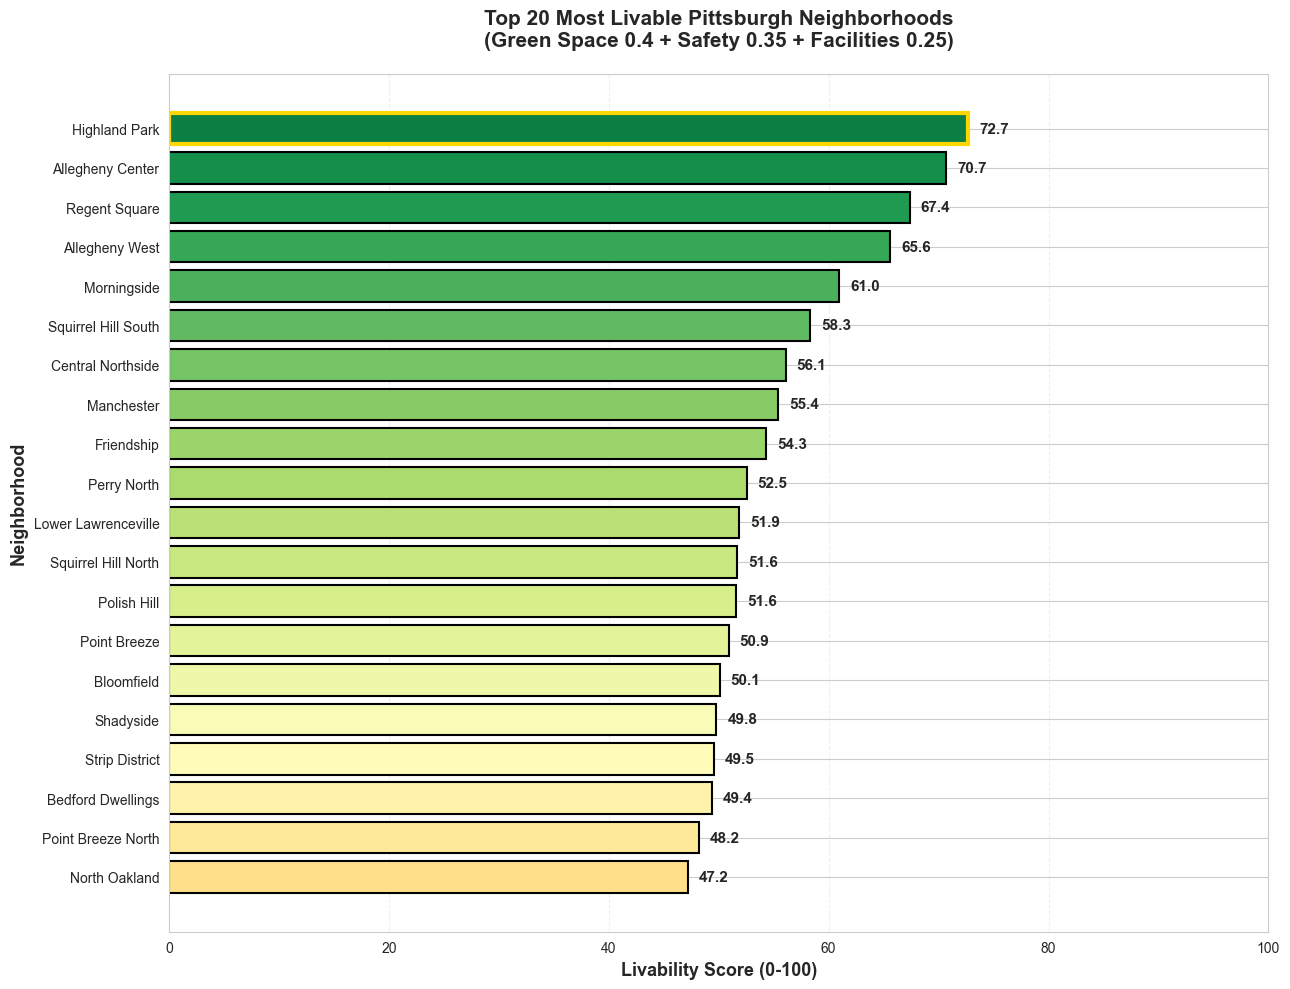

In [13]:
fig, ax = plt.subplots(figsize=(13, 10))
top_20_sorted = combined.head(20).sort_values('livability_score')

colors = plt.cm.RdYlGn(np.linspace(0.4, 0.95, len(top_20_sorted)))
bars = ax.barh(top_20_sorted['hood'], top_20_sorted['livability_score'], color=colors, edgecolor='black', linewidth=1.5)

bars[-1].set_linewidth(3)
bars[-1].set_edgecolor('gold')

for i, (bar, value) in enumerate(zip(bars, top_20_sorted['livability_score'])):
    ax.text(value + 1, i, f'{value:.1f}', va='center', fontsize=11, fontweight='bold')

ax.set_xlabel('Livability Score (0-100)', fontsize=13, fontweight='bold')
ax.set_ylabel('Neighborhood', fontsize=13, fontweight='bold')
ax.set_title('Top 20 Most Livable Pittsburgh Neighborhoods\n(Green Space 0.4 + Safety 0.35 + Facilities 0.25)', fontsize=15, fontweight='bold', pad=20)
ax.set_xlim(0, 100)
ax.grid(axis='x', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig(str(docs_dir / 'livability_top_20.png'), dpi=300, bbox_inches='tight')
print("Saved: livability_top_20.png")
plt.show()

Saved: livability_components_stacked.png


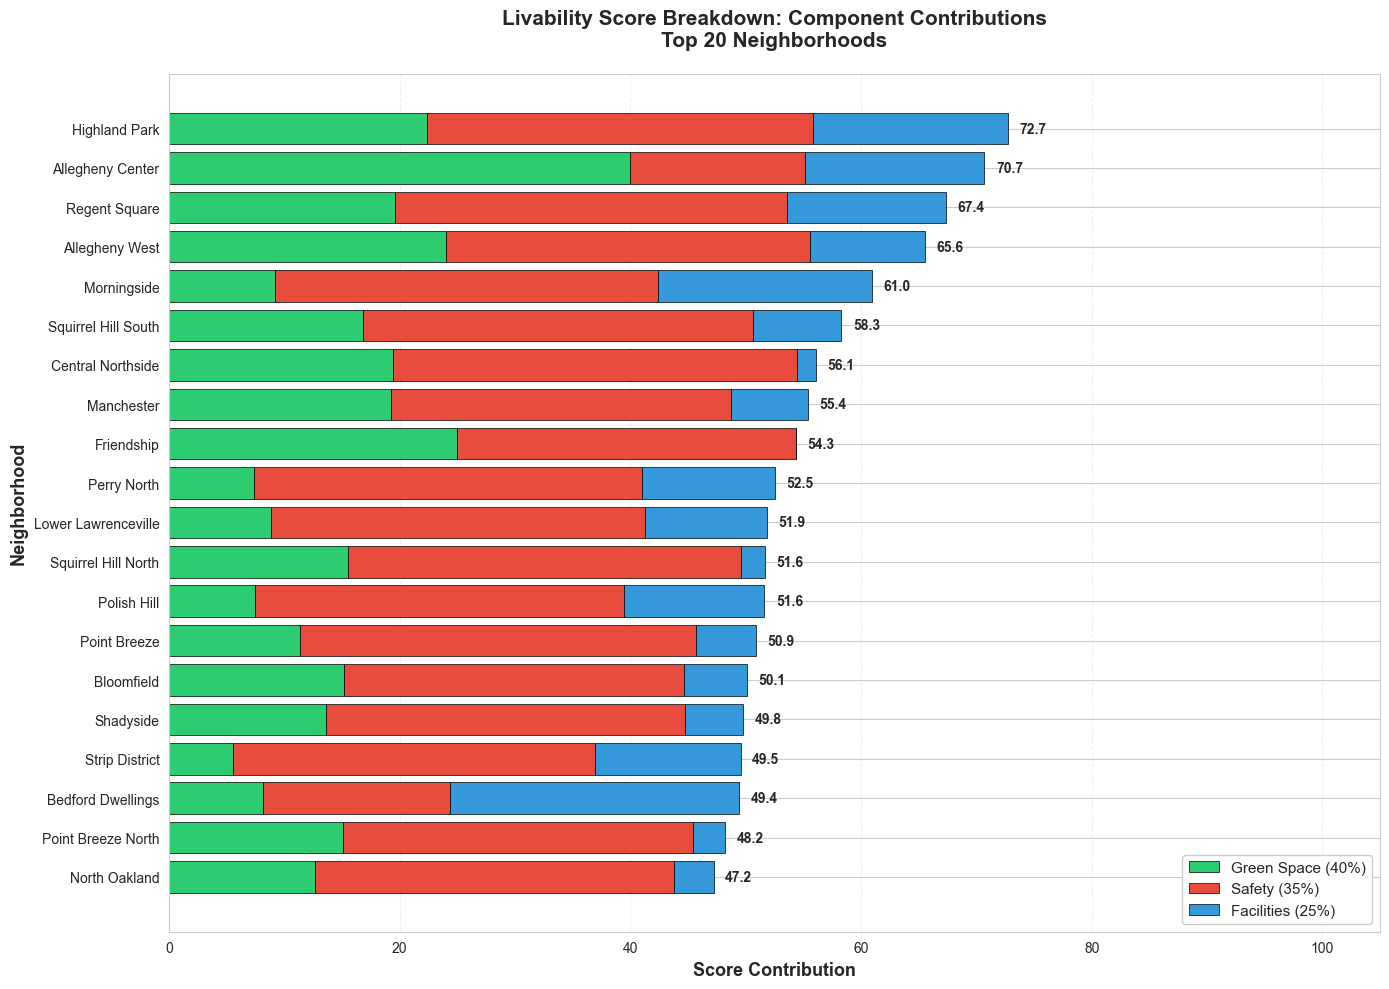

In [14]:
fig, ax = plt.subplots(figsize=(14, 10))
top_20_sorted = combined.head(20).sort_values('livability_score')

green_contribution = top_20_sorted['green_space_score'] * WEIGHT_GREEN_SPACE
safety_contribution = top_20_sorted['safety_score'] * WEIGHT_SAFETY
facilities_contribution = top_20_sorted['facilities_score'] * WEIGHT_FACILITIES

x_pos = np.arange(len(top_20_sorted))
ax.barh(x_pos, green_contribution, label='Green Space (40%)', color='#2ecc71', edgecolor='black', linewidth=0.5)
ax.barh(x_pos, safety_contribution, left=green_contribution, label='Safety (35%)', color='#e74c3c', edgecolor='black', linewidth=0.5)
ax.barh(x_pos, facilities_contribution, left=green_contribution + safety_contribution, label='Facilities (25%)', color='#3498db', edgecolor='black', linewidth=0.5)

for i, (_, row) in enumerate(top_20_sorted.iterrows()):
    ax.text(row['livability_score'] + 1, i, f"{row['livability_score']:.1f}", va='center', fontsize=10, fontweight='bold')

ax.set_yticks(x_pos)
ax.set_yticklabels(top_20_sorted['hood'])
ax.set_xlabel('Score Contribution', fontsize=13, fontweight='bold')
ax.set_ylabel('Neighborhood', fontsize=13, fontweight='bold')
ax.set_title('Livability Score Breakdown: Component Contributions\nTop 20 Neighborhoods', fontsize=15, fontweight='bold', pad=20)
ax.legend(loc='lower right', fontsize=11, framealpha=0.95)
ax.set_xlim(0, 105)
ax.grid(axis='x', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig(str(docs_dir / 'livability_components_stacked.png'), dpi=300, bbox_inches='tight')
print("Saved: livability_components_stacked.png")
plt.show()

Saved: livability_correlation_heatmap.png


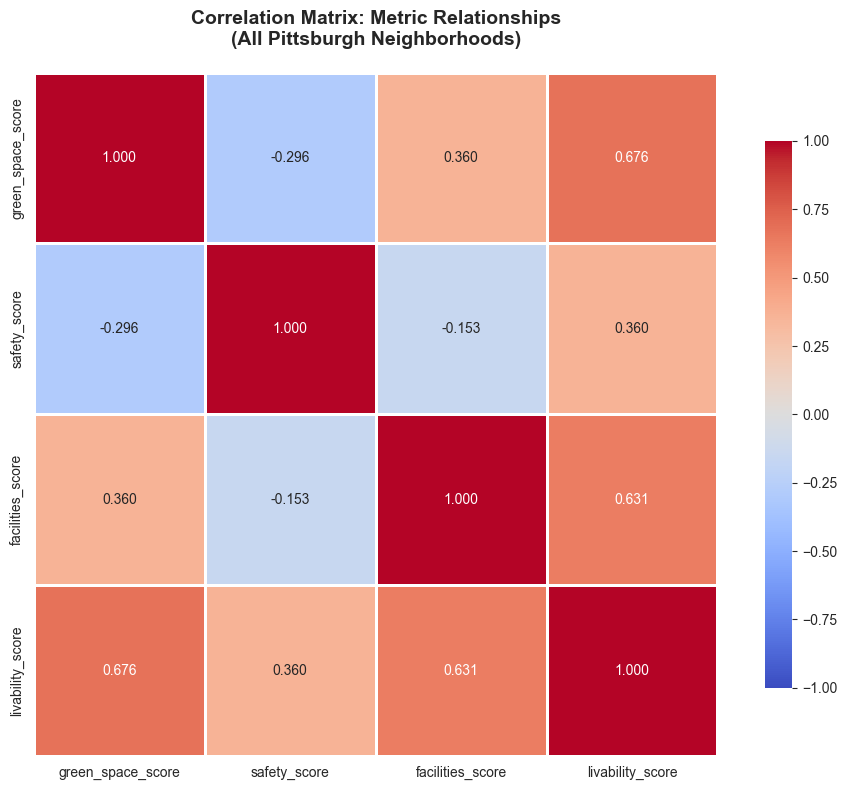

In [15]:
fig, ax = plt.subplots(figsize=(10, 8))

corr_data = combined[['green_space_score', 'safety_score', 'facilities_score', 'livability_score']].corr()

sns.heatmap(corr_data, annot=True, fmt='.3f', cmap='coolwarm', center=0, square=True, linewidths=2, cbar_kws={"shrink": 0.8}, ax=ax, vmin=-1, vmax=1)

ax.set_title('Correlation Matrix: Metric Relationships\n(All Pittsburgh Neighborhoods)', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig(str(docs_dir / 'livability_correlation_heatmap.png'), dpi=300, bbox_inches='tight')
print("Saved: livability_correlation_heatmap.png")
plt.show()

Saved: livability_3d_scatter.png


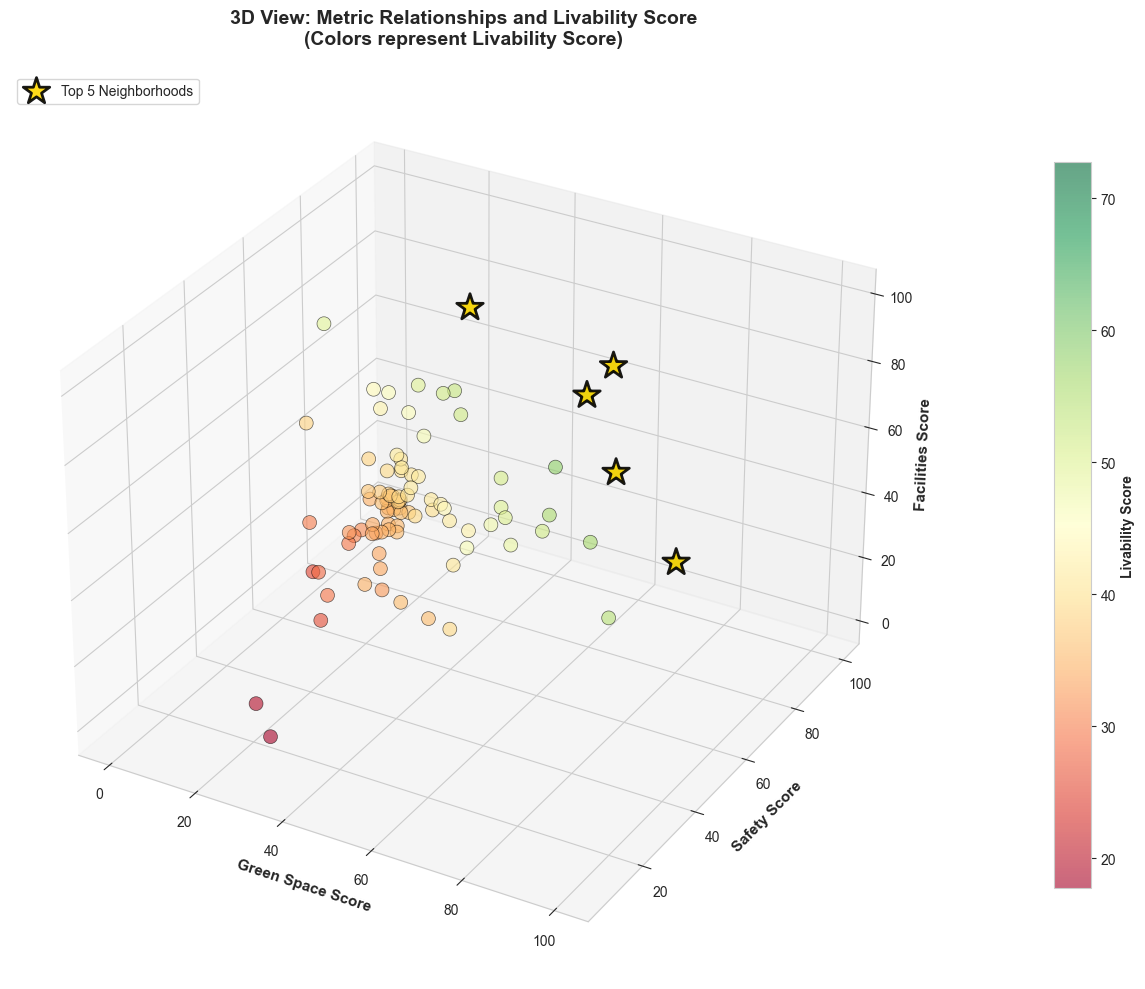

In [16]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(combined['green_space_score'], combined['safety_score'], combined['facilities_score'], c=combined['livability_score'], cmap='RdYlGn', s=100, alpha=0.6, edgecolors='black', linewidth=0.5)

top_5 = combined.head(5)
ax.scatter(top_5['green_space_score'], top_5['safety_score'], top_5['facilities_score'], c='gold', s=400, marker='*', edgecolors='black', linewidth=2, label='Top 5 Neighborhoods', alpha=0.9)

ax.set_xlabel('Green Space Score', fontsize=11, fontweight='bold')
ax.set_ylabel('Safety Score', fontsize=11, fontweight='bold')
ax.set_zlabel('Facilities Score', fontsize=11, fontweight='bold')
ax.set_title('3D View: Metric Relationships and Livability Score\n(Colors represent Livability Score)', fontsize=14, fontweight='bold', pad=20)

cbar = plt.colorbar(scatter, ax=ax, pad=0.1, shrink=0.8)
cbar.set_label('Livability Score', fontsize=10, fontweight='bold')

ax.legend(loc='upper left', fontsize=10)

plt.tight_layout()
plt.savefig(str(docs_dir / 'livability_3d_scatter.png'), dpi=300, bbox_inches='tight')
print("Saved: livability_3d_scatter.png")
plt.show()

Saved: livability_distributions.png


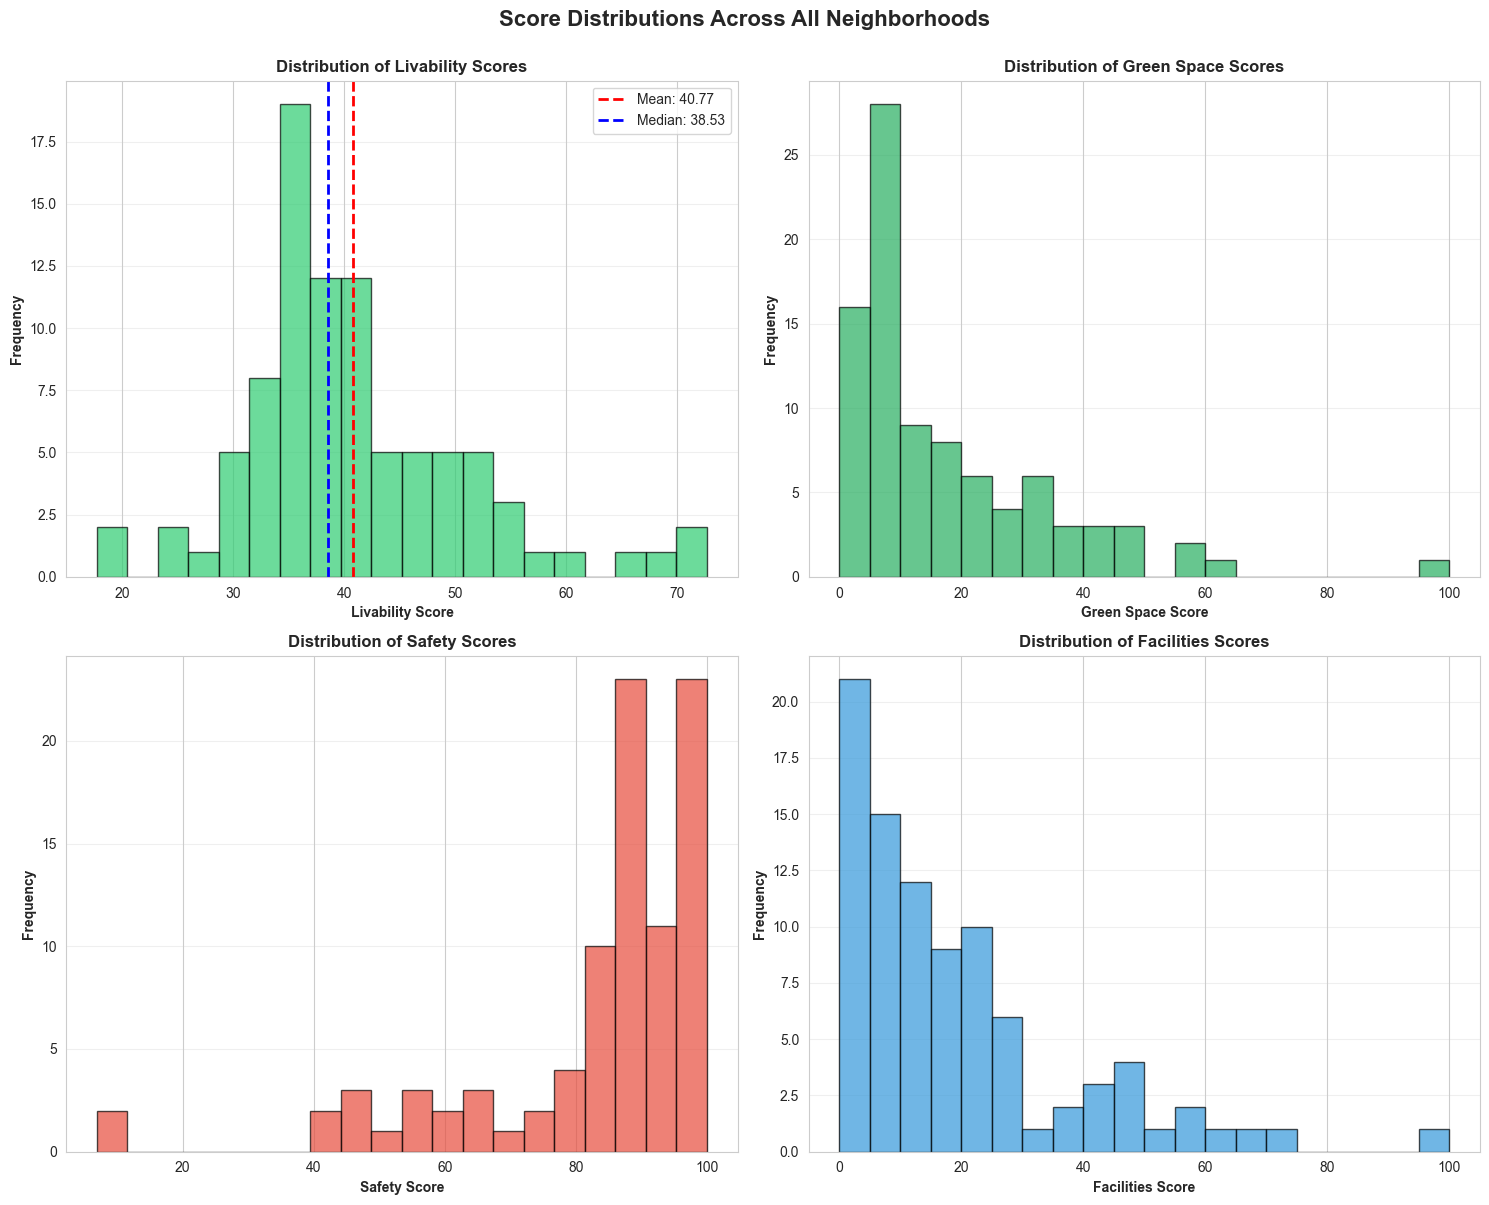

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

axes[0, 0].hist(combined['livability_score'], bins=20, color='#2ecc71', alpha=0.7, edgecolor='black')
axes[0, 0].axvline(combined['livability_score'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {combined['livability_score'].mean():.2f}")
axes[0, 0].axvline(combined['livability_score'].median(), color='blue', linestyle='--', linewidth=2, label=f"Median: {combined['livability_score'].median():.2f}")
axes[0, 0].set_xlabel('Livability Score', fontweight='bold')
axes[0, 0].set_ylabel('Frequency', fontweight='bold')
axes[0, 0].set_title('Distribution of Livability Scores', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

axes[0, 1].hist(combined['green_space_score'], bins=20, color='#27ae60', alpha=0.7, edgecolor='black')
axes[0, 1].set_xlabel('Green Space Score', fontweight='bold')
axes[0, 1].set_ylabel('Frequency', fontweight='bold')
axes[0, 1].set_title('Distribution of Green Space Scores', fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3)

axes[1, 0].hist(combined['safety_score'], bins=20, color='#e74c3c', alpha=0.7, edgecolor='black')
axes[1, 0].set_xlabel('Safety Score', fontweight='bold')
axes[1, 0].set_ylabel('Frequency', fontweight='bold')
axes[1, 0].set_title('Distribution of Safety Scores', fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)

axes[1, 1].hist(combined['facilities_score'], bins=20, color='#3498db', alpha=0.7, edgecolor='black')
axes[1, 1].set_xlabel('Facilities Score', fontweight='bold')
axes[1, 1].set_ylabel('Frequency', fontweight='bold')
axes[1, 1].set_title('Distribution of Facilities Scores', fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.suptitle('Score Distributions Across All Neighborhoods', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig(str(docs_dir / 'livability_distributions.png'), dpi=300, bbox_inches='tight')
print("Saved: livability_distributions.png")
plt.show()

## 1.8 Key Insights and Conclusions

In [18]:
print("\n" + "="*80)
print("KEY INSIGHTS & CONCLUSIONS")
print("="*80)

print(f"\n1. OVERALL LIVABILITY LANDSCAPE")
print(f"   Score Range: {combined['livability_score'].min():.2f} - {combined['livability_score'].max():.2f}")
print(f"   Spread: {combined['livability_score'].max() - combined['livability_score'].min():.2f} points")
print(f"   Standard Deviation: {combined['livability_score'].std():.2f}")
print(f"   Top 25 percent threshold: {combined['livability_score'].quantile(0.75):.2f}")

print(f"\n2. TOP NEIGHBORHOODS")
for idx, (_, row) in enumerate(combined.head(5).iterrows(), 1):
    print(f"   #{idx}: {row['hood']} ({row['livability_score']:.2f})")

print(f"\n3. METRIC CORRELATIONS")
gs_vs_safety = combined['green_space_score'].corr(combined['safety_score'])
gs_vs_facilities = combined['green_space_score'].corr(combined['facilities_score'])
safety_vs_facilities = combined['safety_score'].corr(combined['facilities_score'])

print(f"   Green Space vs Safety: {gs_vs_safety:.3f}")
print(f"   Green Space vs Facilities: {gs_vs_facilities:.3f}")
print(f"   Safety vs Facilities: {safety_vs_facilities:.3f}")

print(f"\n4. RECOMMENDATION SUMMARY")
print(f"   BEST OVERALL: {winner['hood']}")
print(f"   RUNNER-UP: {runner_up['hood']}")
print(f"   HONORABLE MENTION: {third_place['hood']}")


KEY INSIGHTS & CONCLUSIONS

1. OVERALL LIVABILITY LANDSCAPE
   Score Range: 17.71 - 72.71
   Spread: 55.00 points
   Standard Deviation: 10.10
   Top 25 percent threshold: 45.59

2. TOP NEIGHBORHOODS
   #1: Highland Park (72.71)
   #2: Allegheny Center (70.70)
   #3: Regent Square (67.36)
   #4: Allegheny West (65.57)
   #5: Morningside (60.95)

3. METRIC CORRELATIONS
   Green Space vs Safety: -0.296
   Green Space vs Facilities: 0.360
   Safety vs Facilities: -0.153

4. RECOMMENDATION SUMMARY
   BEST OVERALL: Highland Park
   RUNNER-UP: Allegheny Center
   HONORABLE MENTION: Regent Square


## 1.9 Save Final Results

In [19]:
output_df = combined[['hood', 'green_space_score', 'safety_score', 'facilities_score', 'livability_score']].sort_values('livability_score', ascending=False)

output_path = data_dir / 'livability_scores_final.csv'
output_df.to_csv(str(output_path), index=False)
print(f"\nSaved final results: {output_path}")

report_path = docs_dir / 'LIVABILITY_REPORT.txt'
with open(str(report_path), 'w') as f:
    f.write("="*80 + "\\n")
    f.write("PITTSBURGH NEIGHBORHOOD LIVABILITY ANALYSIS - FINAL REPORT\\n")
    f.write("="*80 + "\\n\\n")
    f.write("METHODOLOGY\\n")
    f.write("-" * 80 + "\\n")
    f.write(f"Livability Score = (Green Space x 0.40) + (Safety x 0.35) + (Facilities x 0.25)\\n\\n")
    f.write("WINNER: MOST LIVABLE NEIGHBORHOOD\\n")
    f.write("-" * 80 + "\\n")
    f.write(f"{winner['hood'].upper()}\\n")
    f.write(f"   Livability Score: {winner['livability_score']:.2f}/100\\n")
    f.write(f"   Green Space: {winner['green_space_score']:.2f}/100\\n")
    f.write(f"   Safety: {winner['safety_score']:.2f}/100\\n")
    f.write(f"   Facilities: {winner['facilities_score']:.2f}/100\\n\\n")
    f.write("TOP 10 NEIGHBORHOODS\\n")
    f.write("-" * 80 + "\\n")
    for idx, (_, row) in enumerate(combined.head(10).iterrows(), 1):
        f.write(f"{idx:2d}. {row['hood']:30s} {row['livability_score']:6.2f}\\n")
    f.write("\\n" + "="*80 + "\\n")

print(f"Saved report: {report_path}")
print("\n" + "="*80)
print("All analysis complete!")
print("="*80)


Saved final results: /Users/valimir7/dev/pitt/cmpinf0010/final/data/outputs/livability_scores_final.csv
Saved report: /Users/valimir7/dev/pitt/cmpinf0010/final/docs/LIVABILITY_REPORT.txt

All analysis complete!
